In [47]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import SilhouetteVisualizer 

In [48]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_shape_z = pd.read_csv(os.path.join(folder_path, "features_shape_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_shape_mm = pd.read_csv(os.path.join(folder_path, "features_shape_minmax.csv"))

In [49]:
df_shape_z

,area,perimeter,eccentricity,extent,solidity,orientation,major_axis_length,minor_axis_length,filename,label
0,-0.961415,-0.894772,1.258475,-0.843346,0.135962,0.447795,-0.597306,-1.185373,callo_1.png,smaller_than
1,-0.360419,0.546777,1.265948,-1.740919,-1.705151,-1.271934,0.510064,-0.369311,callo_10.png,smaller_than
2,-1.007075,-1.161657,0.280864,1.120647,1.269197,1.018866,-1.051417,-1.039241,callo_100.png,smaller_than
3,-0.791399,-0.944172,0.602786,1.184475,0.913221,-0.441900,-0.690335,-0.847833,callo_101.png,smaller_than
4,-1.449934,-1.612899,-0.817832,1.002834,1.210664,0.876506,-1.792010,-1.527979,callo_102.png,smaller_than
...,...,...,...,...,...,...,...,...,...,...
532,0.677867,1.059505,-0.758095,-0.543333,-0.607485,-0.690380,0.538420,1.134106,callo_95.png,higher_than
533,1.092142,0.926063,-1.279988,0.358045,0.055104,-1.057077,0.529269,1.361404,callo_96.png,higher_than
534,0.792944,0.682934,0.155389,-0.292736,-0.289068,-0.225443,0.734055,0.798670,callo_97.png,higher_than
535,0.594344,1.013475,-0.407132,-1.763399,-1.467330,1.445790,0.819826,1.257650,callo_98.png,higher_than


In [50]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_shape_z_cl= df_shape_z.drop(columns=['filename', 'label'])

Se realiza clustering con k-means. Para averiguar cual va a ser el mejor valor de k o clusters se aplica el método
del "codo". También se simularán con diferentes números de clusteres la silueta.

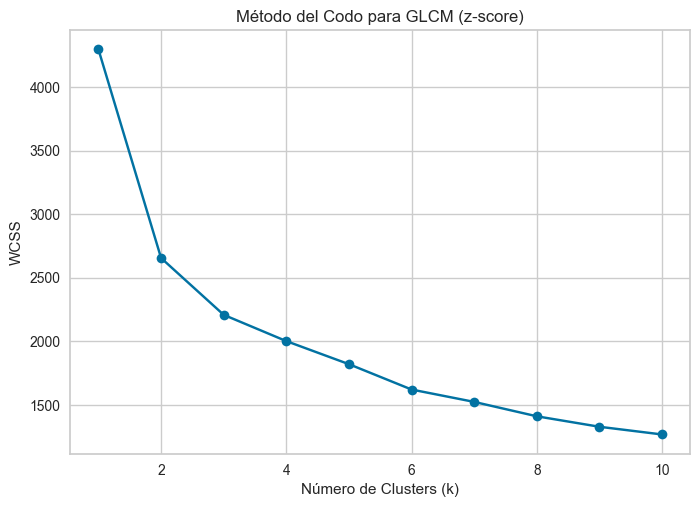

In [51]:
# Método del codo
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    kmeans.fit(df_shape_z_cl)
    WCSS.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para GLCM (z-score)')
plt.grid(True)
plt.show()

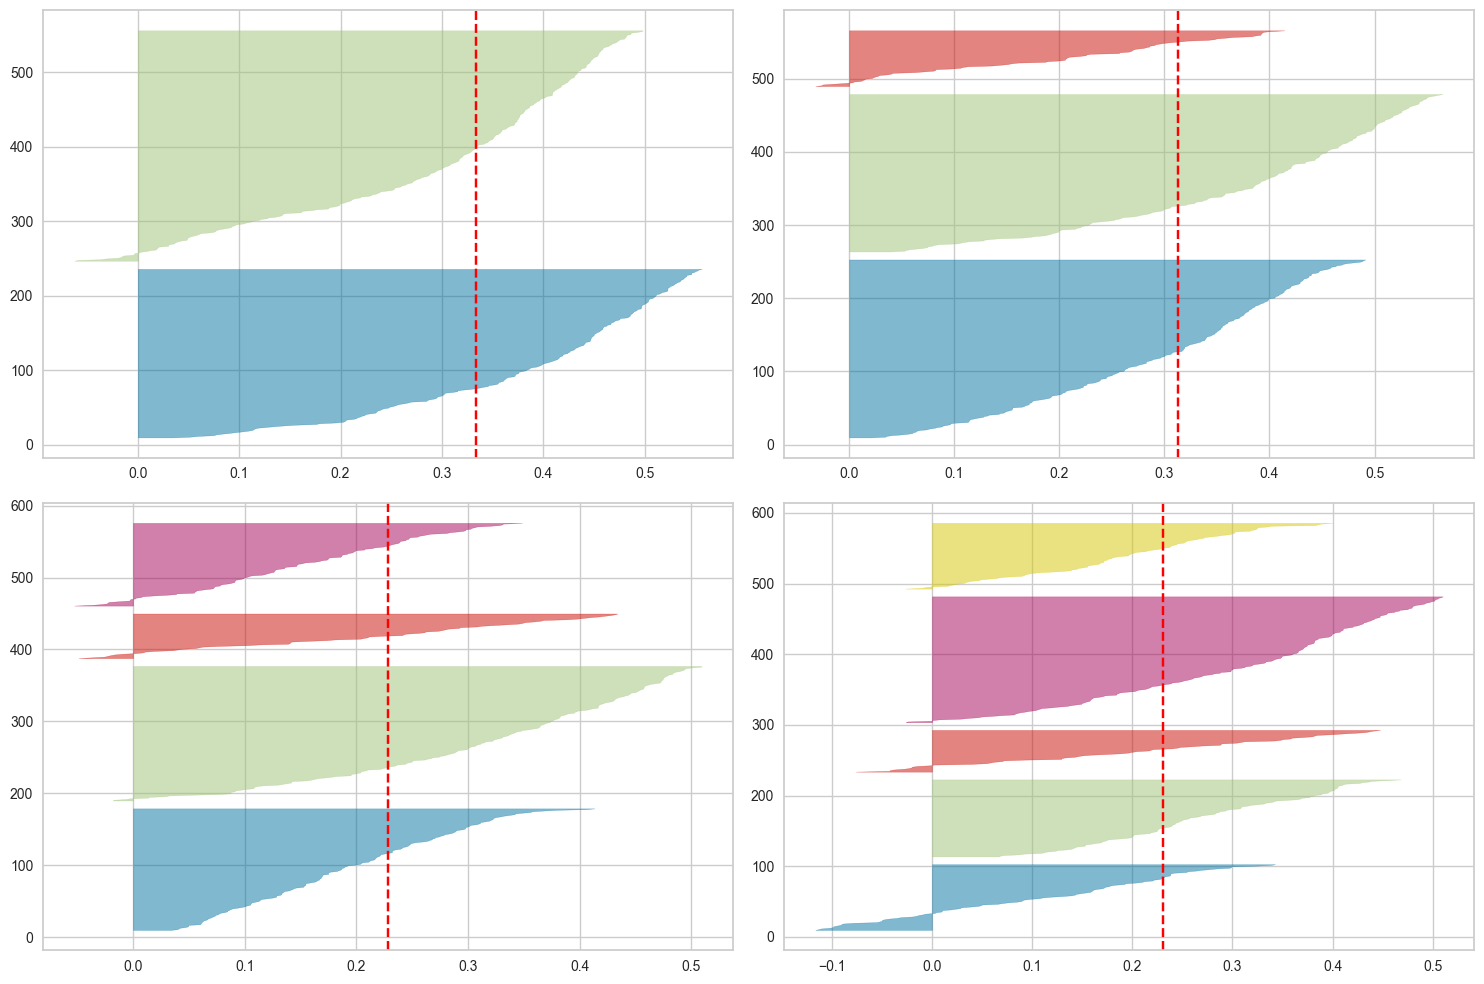

In [52]:
# Creamos la figura con 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probamos con k = 2, 3, 4, 5
for i, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    
    # Posición del subplot
    row = i // 2
    col = i % 2
    
    # Creamos el visualizador y ajustamos los datos
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_shape_z_cl)  

plt.tight_layout()
plt.show()

Aunque se obtiene mejor valor de silueta con dos clusteres, pero se van a probar 3 teniendo en cuenta ambos criterios

In [53]:
#Modelo k-means
cluster_shape_z= KMeans(init='k-means++',n_clusters=2,random_state=42)
cluster_shape_z.fit(df_shape_z_cl)   

KMeans(n_clusters=2, random_state=42)

In [54]:
#Se añaden las etiquetas y vemos en una tabla de contigencia cuantos smaller o higher hay en cada cluster
df_shape_z['Cluster'] = cluster_shape_z.labels_
pd.crosstab(df_shape_z['Cluster'], df_shape_z['label'])

label,higher_than,smaller_than
Cluster,,
0,18,216
1,250,53


In [55]:
silhouette_avg_shape_z = silhouette_score(df_shape_z_cl, cluster_shape_z.labels_)
print(f'Índice de silueta promedio: {silhouette_avg_shape_z}')

Índice de silueta promedio: 0.333307961684949


Ahora se realiza lo mismo pero con la normalización min-max

In [56]:
df_shape_mm

,area,perimeter,eccentricity,extent,solidity,orientation,major_axis_length,minor_axis_length,filename,label
0,0.164032,0.204438,0.840083,0.448592,0.749355,0.638915,0.358292,0.192486,callo_1.png,smaller_than
1,0.297348,0.477599,0.841452,0.301952,0.441238,0.138360,0.592452,0.362256,callo_10.png,smaller_than
2,0.153903,0.153865,0.660993,0.769458,0.939005,0.805135,0.262267,0.222887,callo_100.png,smaller_than
3,0.201746,0.195077,0.719967,0.779886,0.879431,0.379955,0.338620,0.262706,callo_101.png,smaller_than
4,0.055665,0.068359,0.459722,0.750210,0.929210,0.763699,0.105664,0.121212,callo_102.png,smaller_than
...,...,...,...,...,...,...,...,...,...,...
532,0.527668,0.574757,0.470665,0.497607,0.624936,0.307631,0.598448,0.675020,callo_95.png,higher_than
533,0.619565,0.549471,0.375058,0.644869,0.735823,0.200897,0.596513,0.722306,callo_96.png,higher_than
534,0.553195,0.503400,0.638007,0.538548,0.678224,0.442958,0.639816,0.605237,callo_97.png,higher_than
535,0.509140,0.566035,0.534958,0.298279,0.481038,0.929398,0.657953,0.700721,callo_98.png,higher_than


In [57]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_shape_mm_cl= df_shape_mm.drop(columns=['filename', 'label'])

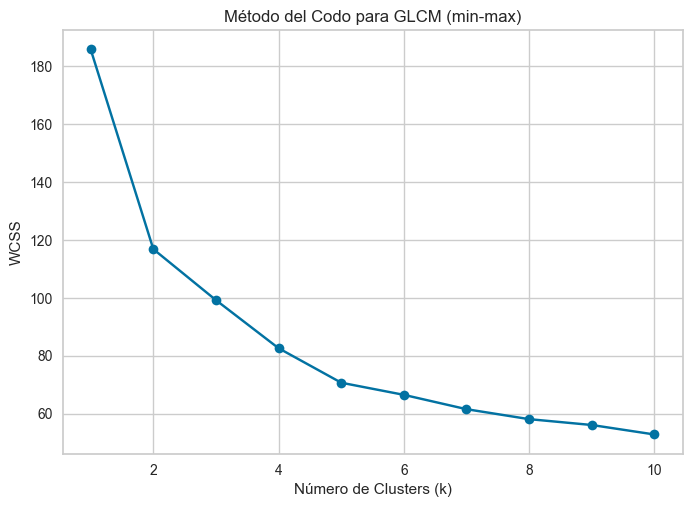

In [58]:
# Método del codo
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    kmeans.fit(df_shape_mm_cl)
    WCSS.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para GLCM (min-max)')
plt.grid(True)
plt.show()

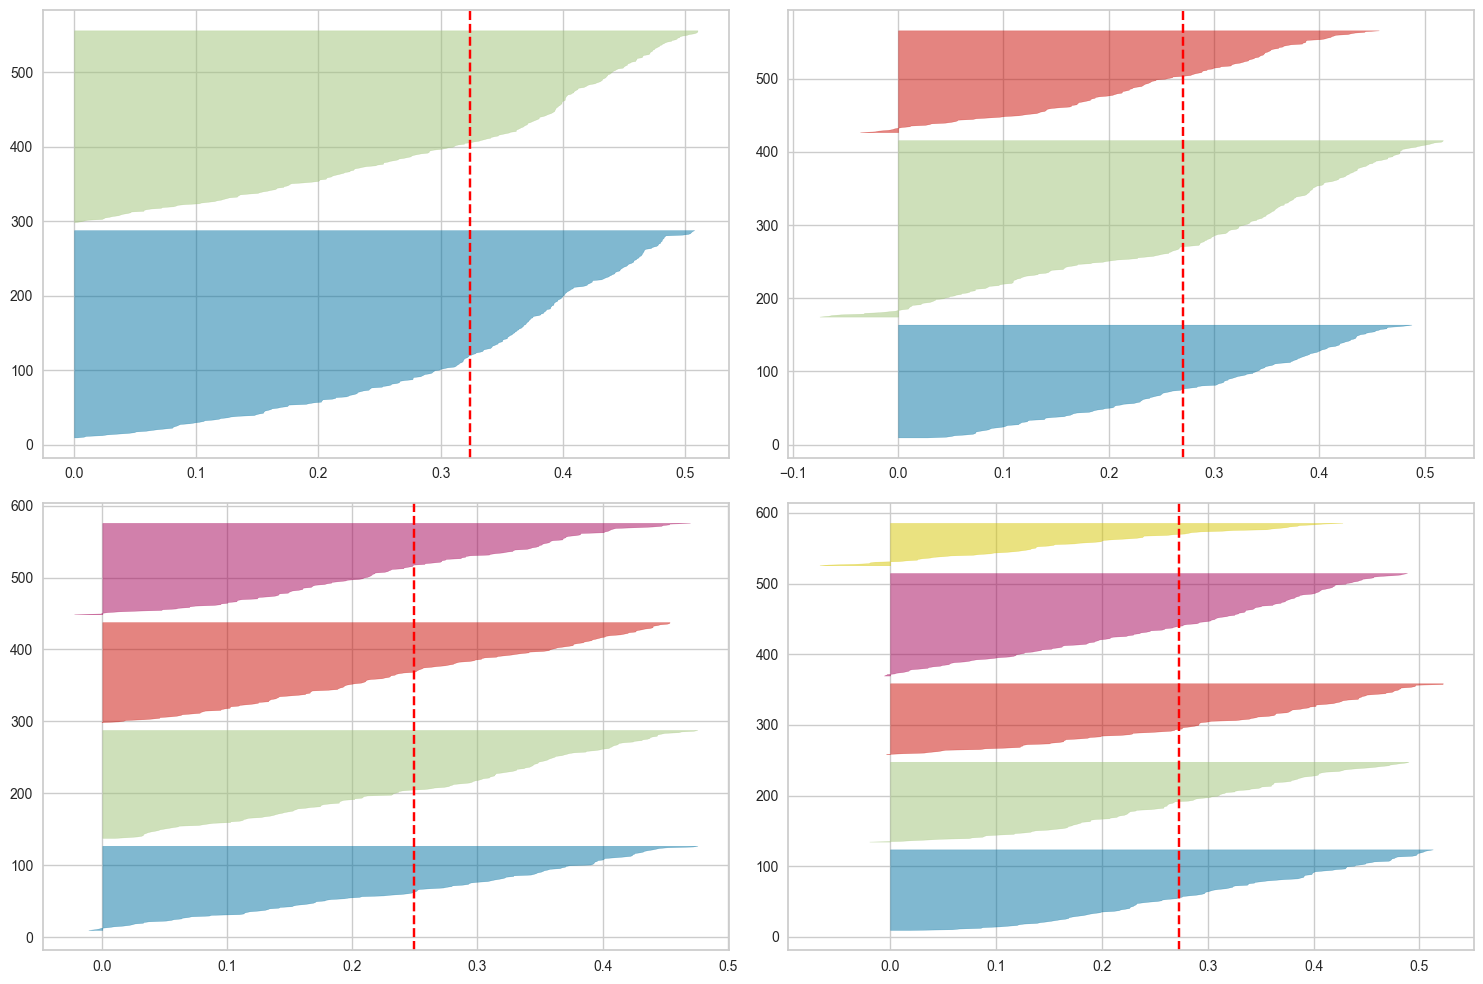

In [59]:
# Creamos la figura con 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probamos con k = 2, 3, 4, 5
for i, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    
    # Posición del subplot
    row = i // 2
    col = i % 2
    
    # Creamos el visualizador y ajustamos los datos
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_shape_mm_cl)  # Usa tu dataframe ya escalado o transformado

plt.tight_layout()
plt.show()

In [63]:
#Modelo k-means
cluster_shape_mm= KMeans(init='k-means++',n_clusters=2,random_state=42)
cluster_shape_mm.fit(df_shape_mm_cl) 

KMeans(n_clusters=2, random_state=42)

In [64]:
#Se añaden las etiquetas y vemos en una tabla de contigencia cuantos smaller o higher hay en cada cluster
df_shape_mm['Cluster'] = cluster_shape_mm.labels_
pd.crosstab(df_shape_mm['Cluster'], df_shape_mm['label'])

label,higher_than,smaller_than
Cluster,,
0,26,235
1,242,34


In [65]:
silhouette_avg_shape_mm = silhouette_score(df_shape_mm_cl, cluster_shape_mm.labels_)
print(f'Índice de silueta promedio: {silhouette_avg_shape_mm}')

Índice de silueta promedio: 0.32387716374680503
